##  Assignment 2 codes for bejing subway lines and graph
# first time using the jupyter note book

## inclass priactice

In [93]:
simple_connection_info = defaultdict(list)

In [94]:
simple_connection_info.update(simple_connection_info_src)

In [95]:
def best_route_search(graph, start):
    visited = [start]
    searched = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in searched: continue
        for successor in graph[frontier]:
            if successor in searched: continue
            print(successor)
            
            #visited = visited + [successor]      # depth first search : the last added point has the prime to search
            visited = [successor] + visited      # breadth first search : the privious added point has the prime to search
            
        searched.add(frontier)
    return searched

In [96]:
number_graph = defaultdict(list)
number_graph.update({
    1:[2,3],
    2:[1,4],
    3:[1,5],
    4:[2,6],
    5:[3,7],
    7:[5,8],
})

In [97]:
best_route_search(number_graph, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [98]:
simple_connection_info['西安']

['兰州', '长沙']

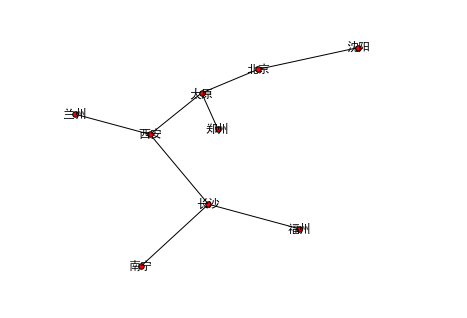

In [99]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30 )

In [103]:
def search(start, destination, connection_graph, sort_candidates):
    pathes = [[start]]
    
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = connection_graph[frontier]
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
                
        visited.add(frontier)
        pathes = sort_candidates(pathes)
                

In [104]:
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [105]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [106]:
def shortest_path_first(pathes):
    if len(pathes) <= 1: 
        return pathes
    def get_path_distance(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i -1], path[i])
        return sorted(pathes, key=get_path_distance)

In [107]:
search('兰州', '福州', simple_connection_info, sort_candidates=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [3]:
import requests

In [4]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [5]:
response = requests.get(url)

In [6]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [9]:
pattern = re.compile(what_we_want)

In [11]:
likes = pattern.findall(response.text)

In [12]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


##Machine Learning

In [13]:
from sklearn.datasets import load_boston

In [16]:
data = load_boston()

In [17]:
x, y = data['data'], data['target']

In [18]:
x[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [19]:
y[1]

21.600000000000001

In [20]:
len(x[:, 0])

506

In [21]:
len(y)

506

In [30]:
%matplotlib inline

In [31]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

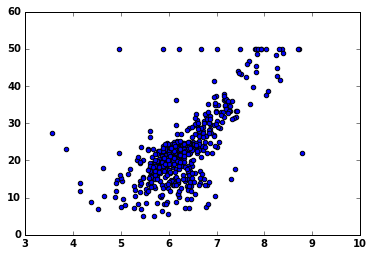

In [32]:
draw_rm_and_price()

In [33]:
import random

In [34]:
def price(rm, a, b):
    return a * rm + b # price function related to the room number

In [35]:
x_rm = x[:, 5]

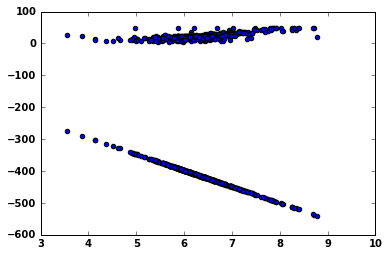

In [38]:
a = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_a_b = [price(r, a, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_a_b)

In [39]:
list(y)

[24.0,
 21.600000000000001,
 34.700000000000003,
 33.399999999999999,
 36.200000000000003,
 28.699999999999999,
 22.899999999999999,
 27.100000000000001,
 16.5,
 18.899999999999999,
 15.0,
 18.899999999999999,
 21.699999999999999,
 20.399999999999999,
 18.199999999999999,
 19.899999999999999,
 23.100000000000001,
 17.5,
 20.199999999999999,
 18.199999999999999,
 13.6,
 19.600000000000001,
 15.199999999999999,
 14.5,
 15.6,
 13.9,
 16.600000000000001,
 14.800000000000001,
 18.399999999999999,
 21.0,
 12.699999999999999,
 14.5,
 13.199999999999999,
 13.1,
 13.5,
 18.899999999999999,
 20.0,
 21.0,
 24.699999999999999,
 30.800000000000001,
 34.899999999999999,
 26.600000000000001,
 25.300000000000001,
 24.699999999999999,
 21.199999999999999,
 19.300000000000001,
 20.0,
 16.600000000000001,
 14.4,
 19.399999999999999,
 19.699999999999999,
 20.5,
 25.0,
 23.399999999999999,
 18.899999999999999,
 35.399999999999999,
 24.699999999999999,
 31.600000000000001,
 23.300000000000001,
 19.600000000

# Loss

$$ loss = \cfrac{1}{n}*\sum_{i=0}^{n}{({y}_i - y)}^2$$

In [47]:
def variance_loss(y, y_hat):  # evaluate the pricision of movemonet
    return sum((y_i, y_hat_i)** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

#random generate a and b to get best result

In [50]:
variance_loss(y, price_by_random_a_b)

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [49]:
trying_times = 2000
min_loss = float('inf')
best_a, best_b = None, None

for i in range(trying_times):
    a = random.random() * 200 - 100
    b = random.random() * 200 -100
    price_by_random_a_b = [price(r, a, b) for r in x[:, 5]]
    
    current_loss = variance_loss(y, price_by_random_a_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_a, best_b = a, b
        print('when time is {}, get best a is {}, best b is {}, and the loss is {}'.format(i, best_a, best_b, min_loss))

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [1]:
import requests

In [2]:
import re

In [3]:
url = "https://map.bjsubway.com"

In [4]:
response = requests.get(url, verify=False)

C:\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
station_no_tran = r'cx="(\d+)"\scy="(\d+)"\s\w+="\d+"\s\w+="([\u4e00-\u9fa5]+)"' 

In [6]:
pattern = re.compile(station_no_tran)

In [10]:
likes = pattern.findall(response.text)

In [11]:
for line in response.text.split('\n'):
    print(line)

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="user-scalable=no, width=device-width, initial-scale=1, maximum-scale=1">
        <meta name="csrf-token" content="aY3VFirre9kNNmgYdXuuHsIGZIOa2KRTEfftujhC">

        <title>北京地铁</title>

        <!-- Meta -->
        
        <link rel="stylesheet" href="https://map.bjsubway.com/css/app.css" type="text/css" media="all" />
        <!-- Styles -->
        
        <!-- Check if the language is set to RTL, so apply the RTL layouts -->
        <!-- Otherwise apply the normal LTR layouts -->
        <style type="text/css">
    body {
        overflow: hidden;
        font-family: '黑体';
    }

    .tt-menu {
      width: 296px;
      margin: 12px 0px;
      margin-left: -20px;
      padding: 8px 0;
      background-color: #fff;
      border: 1px solid #ccc;
      border: 1px solid rgba(0, 0, 0, 0.2);
      overflow-y: 

In [12]:
print(likes)

[]


In [2]:
html = '<circle xmlns="http://www.w3.org/2000/svg" id="SvgjsCircle1746" fill="white" stroke="black" stroke-width="1" cx="1000" cy="740" r="4" sdata="中国美术馆" />'

In [5]:
result = re.findall(pattern, html)

In [6]:
result

[('1000', '740', '中国美术馆')]

In [ ]:
<circle xmlns="http://www.w3.org/2000/svg" class="mask" id="SvgjsCircle2960" fill="white" stroke="black" stroke-width="1" cx="363" cy="790" r="4" sdata="八角游乐园" />

In [2]:
from selenium import webdriver

In [5]:
browser = webdriver.Firefox()
browser.get('https://map.bjsubway.com')
print(browser.page_source)
browser.close()

<html lang="en"><head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="user-scalable=no, width=device-width, initial-scale=1, maximum-scale=1">
        <meta name="csrf-token" content="CgMtqPaFIipZcHeFS2LduXOs27OTHjdF4aJ9iCmk">

        <title>北京地铁</title>

        <!-- Meta -->
        
        <link rel="stylesheet" href="https://map.bjsubway.com/css/app.css" type="text/css" media="all">
        <!-- Styles -->
        
        <!-- Check if the language is set to RTL, so apply the RTL layouts -->
        <!-- Otherwise apply the normal LTR layouts -->
        <style type="text/css">
    body {
        overflow: hidden;
        font-family: '黑体';
    }

    .tt-menu {
      width: 296px;
      margin: 12px 0px;
      margin-left: -20px;
      padding: 8px 0;
      background-color: #fff;
      border: 1px solid #ccc;
      border: 1px solid rgba(0, 0, 0, 0.2);
      overflow-y: auto;
    }

    .tt-su

In [9]:
station_loc = 'https://blog.csdn.net/gisshixisheng/article/details/44976241'

In [10]:
import requests

In [11]:
import re

In [12]:
response = requests.get(station_loc)

In [13]:
for line in response.text.split('\n'):
    print(line)

<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <link rel="canonical" href="https://blog.csdn.net/gisshixisheng/article/details/44976241"/>
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit"/>
    <meta name="force-rendering" content="webkit"/>
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>
    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">
    <meta name="referrer" content="always">
    <meta http-equiv="Cache-Control" content="no-siteapp" /><link rel="alternate" media="handheld" href="#" />
    <meta name="shenma-site-verification" content="5a59773ab8077d4a62bf469ab966a63b_1497598848">
        <meta name="csdn-baidu-search"  content='{"autorun":true,"install":true,"keyword":"北京市地铁线路及站点数据 - LZUGIS"}'>
    
    <link href="http

In [14]:
pre = r'.+?([\u4e00-\u9fa5]+).+\n.+\n.+?(\d+\.\d+).+\n.+?(\d+\.\d+).+'

In [15]:
pattern = re.compile(pre)

In [16]:
likes = pattern.findall(response.text)

In [18]:
print(likes)

[('巴沟', '116.294', '39.9742'), ('苏州街', '116.306', '39.9756'), ('海淀黄庄', '116.318', '39.976'), ('知春里', '116.329', '39.9763'), ('知春路', '116.34', '39.9765'), ('西土城', '116.354', '39.9762'), ('牡丹园', '116.37', '39.9763'), ('健德门', '116.381', '39.9767'), ('北土城', '116.394', '39.9769'), ('安贞门', '116.406', '39.977'), ('惠新西街南口', '116.418', '39.977'), ('芍药居', '116.436', '39.9779'), ('太阳宫', '116.448', '39.9727'), ('三元桥', '116.457', '39.9614'), ('亮马桥', '116.462', '39.9494'), ('农业展览馆', '116.462', '39.9416'), ('团结湖', '116.462', '39.9337'), ('呼家楼', '116.462', '39.9232'), ('金台夕照', '116.462', '39.9167'), ('国贸', '116.46', '39.9084'), ('双井', '116.462', '39.8935'), ('劲松', '116.461', '39.8844'), ('潘家园', '116.461', '39.8755'), ('十里河', '116.458', '39.8659'), ('分钟寺', '116.454', '39.8519'), ('成寿寺', '116.447', '39.8459'), ('宋家庄', '116.428', '39.8457'), ('石榴庄', '116.414', '39.8459'), ('大红门', '116.399', '39.8454'), ('角门东', '116.385', '39.8451'), ('角门西', '116.371', '39.8459'), ('草桥', '116.351', '39.8459'), ('纪家庙', '11

In [31]:
city_location = {}
for i in range(len(likes)):
    
    city, long, lan = likes[i]
    long = float(long)
    lan = float(lan)
    if long < 116.0 or lan < 39.0:
        likes.pop(i)
    city_location[city] = (long, lan)
    
        

In [32]:
city_location

{'七里庄': (116.294, 39.8675),
 '万寿路': (116.295, 39.9075),
 '万源街': (116.505, 39.8031),
 '三元桥': (116.457, 39.9614),
 '上地': (116.32, 40.033),
 '东单': (116.418, 39.9083),
 '东四': (116.417, 39.9244),
 '东四十条': (116.434, 39.9337),
 '东夏园': (116.736, 39.9029),
 '东大桥': (116.452, 39.9231),
 '东湖渠': (116.467, 40.0102),
 '东直门': (116.435, 39.9424),
 '东管头': (116.321, 39.8679),
 '东风北桥': (116.487, 39.9576),
 '中关村': (116.316, 39.9839),
 '丰台东大街': (116.294, 39.8553),
 '丰台南路': (116.297, 39.8414),
 '丰台科技园': (116.297, 39.8252),
 '丰台站': (116.305, 39.8499),
 '临河里': (116.679, 39.8754),
 '丽泽商务区': (116.336, 39.8681),
 '义和庄': (116.319, 39.7125),
 '九棵树': (116.658, 39.8902),
 '九龙山': (116.478, 39.8932),
 '五棵松': (116.274, 39.9075),
 '五道口': (116.338, 39.9929),
 '亦庄文化园': (116.491, 39.8068),
 '亦庄桥': (116.48, 39.803),
 '亮马桥': (116.462, 39.9494),
 '人民大学': (116.321, 39.9669),
 '什刹海': (116.396, 39.9374),
 '传媒大学': (116.555, 39.9092),
 '俸伯': (116.685, 40.1326),
 '健德门': (116.381, 39.9767),
 '光熙门': (116.432, 39.9684),
 '八宝山': (116.23

In [17]:
import networkx as nx

In [18]:
subway_graph = nx.Graph()

In [20]:
subway_graph.add_nodes_from(list(position.keys()))

In [21]:
%matplotlib inline

In [22]:
import matplotlib

In [23]:
import matplotlib.pyplot as plt

In [24]:
from IPython.core.pylabtools import figsize

In [25]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

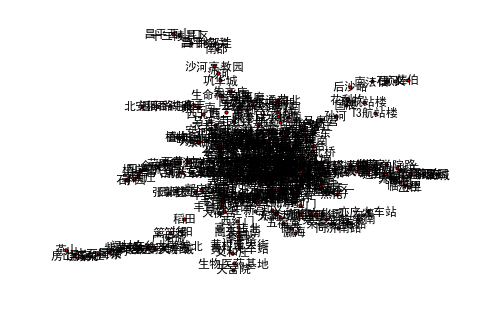

In [26]:
nx.draw(subway_graph, position, with_labels= True, node_size=10)

beautifulsoup practice 
get the connections between the stations

In [27]:
weburl = 'https://www.bjsubway.com/station/zjgls/#'

In [28]:
import requests

In [29]:
from bs4 import BeautifulSoup

In [30]:
import re

In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [32]:
line_response = requests.get(weburl, verify=False)
#line_response.encoding('gbk')

C:\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [33]:
html = line_response.content.decode(encoding='gb2312')

In [34]:
for line in html.split('\n'):
    print(line)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />
<title>站间公里数 | 北京地铁官方网站</title>
<meta name="keywords" content="北京地铁官方网站,首末车时间" />
<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />
<link rel="shortcut icon" href="http://www.bjsubway.com/favicon.ico" type="image/x-icon" />
<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css" />
<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css" />
<script type="text/javascript" src="http://www.bjsubway.com/subway/js/jquery.js"></script>
<script type="text/javascript" src="http://www.bjsubway.com/subway/js/around.js"></script>
<script type="text/javascript">
/*线路名称多窗口切换效果*/
function GetId(id){
  return document.getElementById(id)        
 }
  function doClick(o){
  var

In [35]:
soup = BeautifulSoup(html, 'lxml')

In [37]:
stationInfo = soup.find_all('tbody')

In [38]:
stationInfo

[<tbody>
 <tr>
 <th>苹果园――古城</th>
 <td width="146">2606</td>
 <td width="148">上行/下行</td>
 </tr>
 <tr>
 <th>古城――八角游乐园</th>
 <td>1921</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>八角游乐园――八宝山</th>
 <td>1953</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>八宝山――玉泉路</th>
 <td>1479</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>玉泉路――五棵松</th>
 <td>1810</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>五棵松――万寿路</th>
 <td>1778</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>万寿路――公主坟</th>
 <td>1313</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>公主坟――军事博物馆</th>
 <td>1172</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>军事博物馆――木樨地</th>
 <td>1166</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>木樨地――南礼士路</th>
 <td>1291</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>南礼士路――复兴门</th>
 <td>424</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>复兴门――西单</th>
 <td>1590</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>西单――天安门西</th>
 <td>1217</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>天安门西――天安门东</th>
 <td>925</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>天安门东――王府井</th>
 <td>852</td>
 <td>上行/下行</td>
 </tr>
 <tr>
 <th>王府井―

In [39]:
extract = r'\h>([\u4e00-\u9fa5]+).*?([\u4e00-\u9fa5]+)<'
obj = []
for content in stationInfo:
    temp = re.findall(extract, str(content))
    obj += temp
    
    
print(obj) # why only print the first line  \h>.*?<

[('苹果园', '古城'), ('古城', '八角游乐园'), ('八角游乐园', '八宝山'), ('八宝山', '玉泉路'), ('玉泉路', '五棵松'), ('五棵松', '万寿路'), ('万寿路', '公主坟'), ('公主坟', '军事博物馆'), ('军事博物馆', '木樨地'), ('木樨地', '南礼士路'), ('南礼士路', '复兴门'), ('复兴门', '西单'), ('西单', '天安门西'), ('天安门西', '天安门东'), ('天安门东', '王府井'), ('王府井', '东单'), ('东单', '建国门'), ('建国门', '永安里'), ('永安里', '国贸'), ('国贸', '大望路'), ('大望路', '四惠'), ('四惠', '四惠东'), ('西直门', '车公庄'), ('车公庄', '阜成门'), ('阜成门', '复兴门'), ('复兴门', '长椿街'), ('长椿街', '宣武门'), ('宣武门', '和平门'), ('和平门', '前门'), ('前门', '崇文门'), ('崇文门', '北京站'), ('北京站', '建国门'), ('建国门', '朝阳门'), ('朝阳门', '东四十条'), ('东四十条', '东直门'), ('东直门', '雍和宫'), ('雍和宫', '安定门'), ('安定门', '鼓楼大街'), ('鼓楼大街', '积水潭'), ('积水潭', '西直门'), ('安河桥北', '北宫门'), ('北宫门', '西苑'), ('西苑', '圆明园'), ('圆明园', '北京大学东门'), ('北京大学东门', '中关村'), ('中关村', '海淀黄庄'), ('海淀黄庄', '人民大学'), ('人民大学', '魏公村'), ('魏公村', '国家图书馆'), ('国家图书馆', '动物园'), ('动物园', '西直门'), ('西直门', '新街口'), ('新街口', '平安里'), ('平安里', '西四'), ('西四', '灵境胡同'), ('灵境胡同', '西单'), ('西单', '宣武门'), ('宣武门', '菜市口'), ('菜市口', '陶然亭'), ('陶然亭', '北京南站'), ('北京南站', '马家堡'), ('马家

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: bad escape \h


In [40]:
from collections import defaultdict

In [41]:
subway_connection = defaultdict(list)
for item in obj:
    subway_connection[item[0]].append(item[1])
    subway_connection[item[1]].append(item[0])
    
    

In [42]:
subway_connection

defaultdict(list,
            {'七里庄': ['六里桥', '丰台东大街', '大井', '西局'],
             '万寿路': ['五棵松', '公主坟'],
             '万源街': ['亦庄文化园', '荣京东街'],
             '三元桥': ['太阳宫', '亮马桥', '东直门', '航站楼'],
             '上地': ['五道口', '西二旗'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '东四': ['张自忠路', '灯市口', '南锣鼓巷', '朝阳门'],
             '东四十条': ['朝阳门', '东直门'],
             '东夏园': ['郝家府', '潞城'],
             '东大桥': ['朝阳门', '呼家楼'],
             '东湖渠': ['望京', '来广营'],
             '东直门': ['东四十条', '雍和宫', '柳芳', '三元桥'],
             '东风北桥': ['枣营', '将台'],
             '中关村': ['北京大学东门', '海淀黄庄'],
             '丰台东大街': ['七里庄', '丰台南路'],
             '丰台南路': ['丰台东大街', '科怡路'],
             '丰台科技园': ['科怡路', '郭公庄'],
             '丰台站': ['首经贸', '泥洼'],
             '临河里': ['梨园', '土桥'],
             '义和庄': ['黄村火车站', '生物医药基地'],
             '九棵树': ['果园', '梨园'],
             '九龙山': ['双井', '大郊亭', '平乐园', '大望路'],
             '五棵松': ['玉泉路', '万寿路'],
             '五道口': ['知春路', '上地'],
             '亦庄文化园': ['

In [43]:
subway_with_route = nx.Graph(subway_connection)

NetworkXError: Node '高家园' has no position.

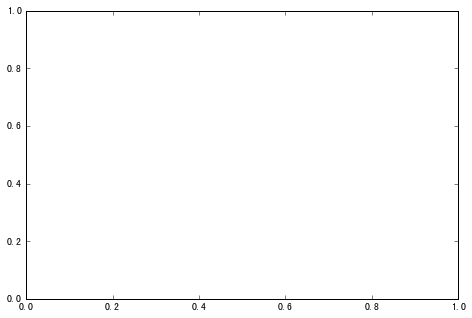

In [44]:
nx.draw(subway_with_route, position, with_labels=True, node_size=30)
# 站点信息与线路信息不匹配，map的地址未更新

从高德地图爬取站点坐标

In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
import json

In [4]:
selfurl = 'http://map.amap.com/subway/index.html?&1100'
responses = requests.get(selfurl)
data = responses.text
data = data.encode('utf-8')

In [5]:
data

b'<!DOCTYPE html>\n<!--[if !IE]><!-->\n\t<html>\n<!--<![endif]-->\n<!--[if lte IE 8]>\n\t<html xmlns:v="urn:schemas-microsoft-com:vml" class="ie">\n<![endif]-->\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t<!-- <meta name="viewport" content="width=device-width, initial-scale=0.2, maximum-scale=3.0, minimum-scale=1.0, user-scalable=yes" /> -->\n\t<meta name="Keywords" content="\xc3\xa5\xc2\x9c\xc2\xb0\xc3\xa5\xc2\x9b\xc2\xbe\xc3\xaf\xc2\xbc\xc2\x8c\xc3\xa9\xc2\xab\xc2\x98\xc3\xa5\xc2\xbe\xc2\xb7\xc3\xa5\xc2\x9c\xc2\xb0\xc3\xa5\xc2\x9b\xc2\xbe\xc3\xaf\xc2\xbc\xc2\x8c\xc3\xa9\xc2\xab\xc2\x98\xc3\xa5\xc2\xbe\xc2\xb7\xc3\xa5\xc2\x9c\xc2\xb0\xc3\xa5\xc2\x9b\xc2\xbe\xc3\xa5\xc2\xae\xc2\x98\xc3\xa7\xc2\xbd\xc2\x91\xc3\xaf\xc2\xbc\xc2\x8camap\xc3\xa5\xc2\x9c\xc2\xb0\xc3\xa5\xc2\x9b\xc2\xbe\xc3\xaf\xc2\xbc\xc2\x8c\xc3\xa6\xc2\x90\xc2\x9c\xc3\xa7\xc2\xb4\xc2\xa2\xc3\xa5\xc2\x9c\xc2\xb0\xc3\xa7\xc2\x82\xc2\xb9\xc3\xaf\xc2\xbc\xc2\x8c\xc3\xa5\xc2\x85\xc2\xac\x

In [6]:
newsoup = BeautifulSoup(data, 'lxml')

In [9]:
url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=1100_drw_beijing.json'
response = requests.get(url)
html = response.text
result = json.loads(html)

In [12]:
result['l']

[{'c': ['104 758',
   '121 758',
   '131 758',
   '151 758',
   '154 756',
   '155 754',
   '155 744',
   '155 735',
   '155 724',
   '155 711',
   '155 705',
   '155 696',
   '155 687',
   '157 685',
   '161 684',
   '180 684',
   '181 684',
   '203 684',
   '226 684',
   '243 684',
   '270 684'],
  'cl': 'B35A1F',
  'f': [{'c': ['270 681',
     '243 681',
     '226 681',
     '203 681',
     '180 681',
     '160 681',
     '155 682',
     '152 687',
     '152 696',
     '152 705',
     '152 711',
     '152 724',
     '153 735',
     '153 744',
     '153 753',
     '152 754',
     '150 755',
     '131 755',
     '121 755',
     '104 755'],
    'li': '900000069871'},
   {'c': ['104 760',
     '121 760',
     '131 760',
     '151 760',
     '156 759',
     '158 754',
     '158 744',
     '158 735',
     '158 724',
     '158 711',
     '158 705',
     '158 696',
     '158 688',
     '159 687',
     '161 687',
     '180 687',
     '203 687',
     '226 687',
     '243 687',
     '270 687']

In [15]:
position = {}
for node in result['l']:
    for start in node['st']:
        long, lat = start['sl'].split(',')
        long, lat = float(long), float(lat)
        position[start['n']] = (long, lat)
        
    

In [16]:
position

{'T2航站楼': (116.592808, 40.079311),
 'T3航站楼': (116.615583, 40.052657),
 '七里庄': (116.294292, 39.866773),
 '万安': (116.231977, 39.984001),
 '万寿路': (116.294765, 39.907474),
 '万源街': (116.505403, 39.802971),
 '三元桥': (116.456997, 39.961508),
 '上地': (116.320193, 40.033007),
 '上岸': (116.122225, 39.905138),
 '东单': (116.41848, 39.908325),
 '东四': (116.417493, 39.92437),
 '东四十条': (116.434133, 39.933801),
 '东夏园': (116.73385, 39.903147),
 '东大桥': (116.451657, 39.923054),
 '东湖渠': (116.467412, 40.01067),
 '东直门': (116.435842, 39.941626),
 '东风北桥': (116.485919, 39.958375),
 '东高地': (116.409427, 39.805074),
 '中关村': (116.316467, 39.983991),
 '中国美术馆': (116.410803, 39.923705),
 '丰台东大街': (116.293857, 39.855111),
 '丰台南路': (116.296748, 39.840444),
 '丰台科技园': (116.297176, 39.825233),
 '丰台站': (116.30454, 39.849639),
 '临河里': (116.678811, 39.875496),
 '义和庄': (116.319079, 39.712387),
 '九棵树': (116.657533, 39.890278),
 '九龙山': (116.478695, 39.893222),
 '五棵松': (116.273987, 39.907456),
 '五福堂': (116.423903, 39.785046),
 '五道口':